In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [5]:
df.loc[:,'Total'] = df.sum(numeric_only=True, axis=1)

In [6]:
df.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


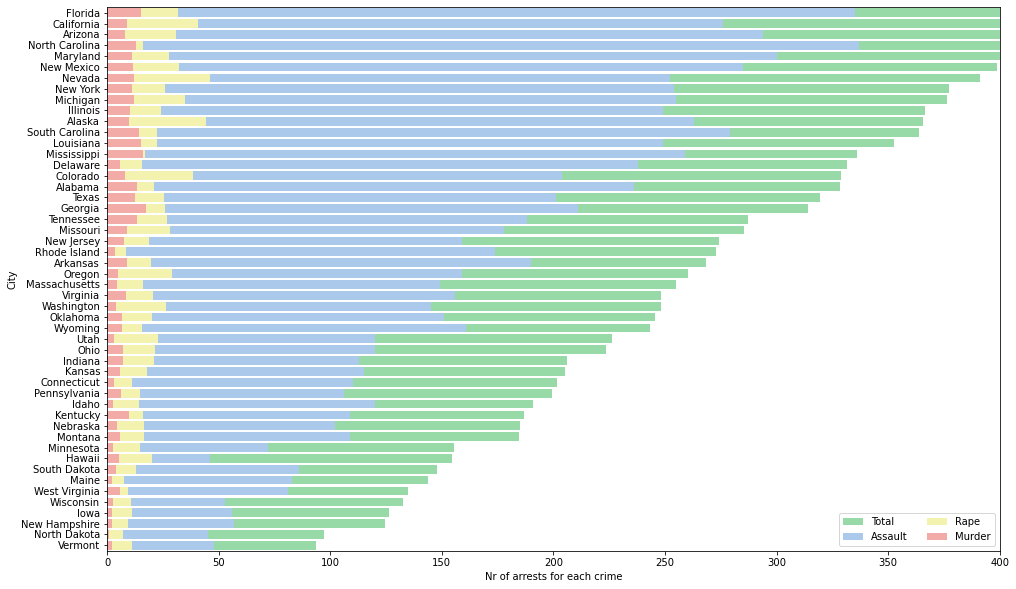

In [7]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

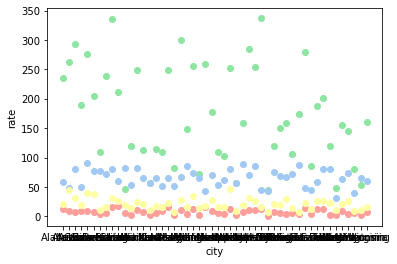

In [8]:
plt.scatter(df.City, df.Murder, color='r')
plt.scatter(df.City, df.Assault, color='g')
plt.scatter(df.City, df.Urbanpop, color='b')
plt.scatter(df.City, df.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [9]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [10]:
df_norm = norm_func(df.iloc[:,1:]) 

In [11]:
df_norm.head()

,Murder,Assault,Urbanpop,Rape,Total
0,0.746988,0.654110,0.440678,0.359173,0.637029
1,0.554217,0.746575,0.271186,0.961240,0.737598
2,0.439759,0.852740,0.813559,0.612403,0.866631
3,0.481928,0.496575,0.305085,0.315245,0.474112
4,0.493976,0.791096,1.000000,0.860465,0.876118


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


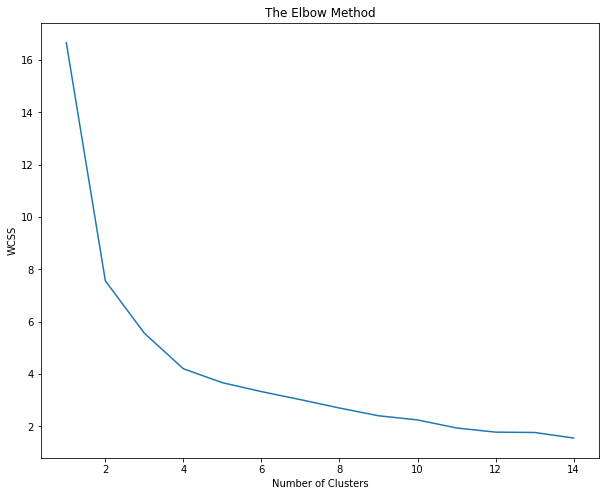

In [12]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 15):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 15), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [13]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)  

In [14]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [15]:
y_kmeans 

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [16]:
clf.cluster_centers_ 

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189, 0.79066143],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868, 0.14364952],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408, 0.64875305],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951, 0.39742956]])

In [17]:
clf.inertia_

4.203497562163753

In [18]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df

,City,Murder,Assault,Urbanpop,Rape,Total,clust
0,Alabama,13.2,236,58,21.2,328.4,2
1,Alaska,10.0,263,48,44.5,365.5,0
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,2
4,California,9.0,276,91,40.6,416.6,0
5,Colorado,7.9,204,78,38.7,328.6,0
6,Connecticut,3.3,110,77,11.1,201.4,3
7,Delaware,5.9,238,72,15.8,331.7,3
8,Florida,15.4,335,80,31.9,462.3,0
9,Georgia,17.4,211,60,25.8,314.2,2


In [19]:
df.iloc[:,1:12].groupby(df.clust).mean() 

,Murder,Assault,Urbanpop,Rape,Total,clust
clust,,,,,,
0,10.966667,264.000000,76.500000,33.608333,385.075000,0.0
1,3.600000,78.538462,52.076923,12.176923,146.392308,1.0
2,13.937500,243.625000,53.750000,21.412500,332.725000,2.0
3,5.852941,141.176471,73.647059,19.335294,240.011765,3.0


In [20]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

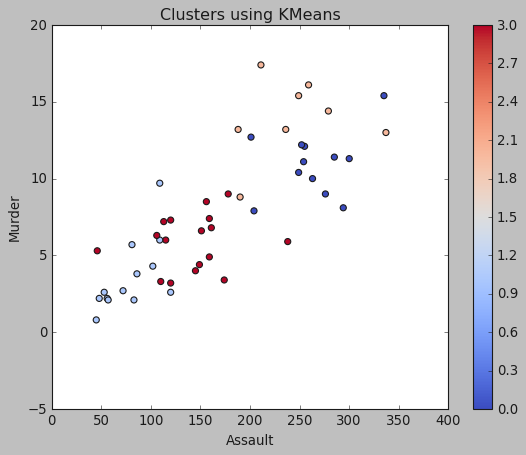

In [21]:
df.plot(x="Assault",y ="Murder",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [22]:
WCSS  

[16.66697402468964,
 7.566673636350291,
 5.562095068096147,
 4.203497562163753,
 3.6704520011061867,
 3.3303864316766734,
 3.0231001687969608,
 2.7029379753793212,
 2.4073417417247787,
 2.247778810605913,
 1.9401182666981114,
 1.7810394901574509,
 1.7682240091758157,
 1.5556179917375161]

In [23]:
#HClustring
df = pd.read_csv("crime_data.csv")

In [24]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x) 

In [26]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [27]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
data  

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


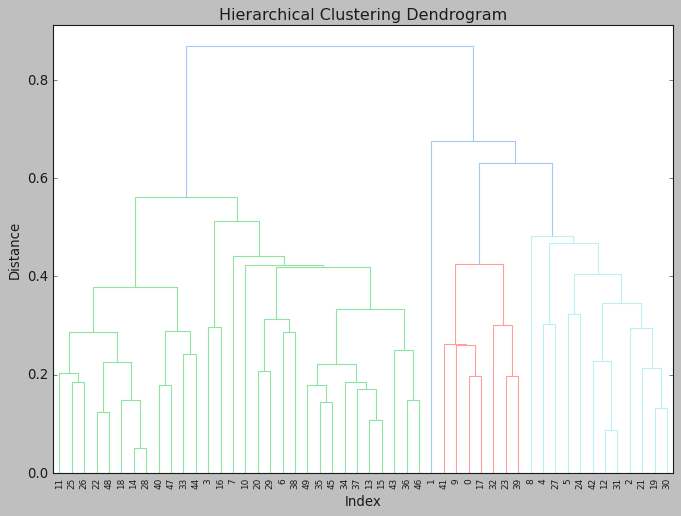

In [28]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
)
plt.show()    

In [29]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column 
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [30]:
df.iloc[:,1:].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.715000,132.300000,70.800000,18.100000,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.180000,78.700000,49.300000,11.630000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_subset = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:12]))
df_subset  

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,1.618677
1,0.513019,1.118060,-1.224067,2.509424,2.488933
2,0.072361,1.493817,1.009122,1.053466,-0.121836
3,0.234708,0.233212,-1.084492,-0.186794,-0.992092
4,0.281093,1.275635,1.776781,2.088814,-0.121836
5,0.025976,0.402909,0.869548,1.883901,-0.121836
6,-1.040880,-0.736484,0.799761,-1.092723,-0.992092
7,-0.437875,0.815030,0.450825,-0.585834,-0.992092
8,1.765415,1.990786,1.009122,1.150530,-0.121836
9,2.229265,0.487757,-0.386621,0.492653,1.618677


In [32]:
#DBSCAN
df = pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [33]:
print(df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [34]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [35]:
df = df.drop(['Rape'],axis=1)

In [36]:
array=df.values
array  

array([['Alabama', 13.2, 236, 58],
       ['Alaska', 10.0, 263, 48],
       ['Arizona', 8.1, 294, 80],
       ['Arkansas', 8.8, 190, 50],
       ['California', 9.0, 276, 91],
       ['Colorado', 7.9, 204, 78],
       ['Connecticut', 3.3, 110, 77],
       ['Delaware', 5.9, 238, 72],
       ['Florida', 15.4, 335, 80],
       ['Georgia', 17.4, 211, 60],
       ['Hawaii', 5.3, 46, 83],
       ['Idaho', 2.6, 120, 54],
       ['Illinois', 10.4, 249, 83],
       ['Indiana', 7.2, 113, 65],
       ['Iowa', 2.2, 56, 57],
       ['Kansas', 6.0, 115, 66],
       ['Kentucky', 9.7, 109, 52],
       ['Louisiana', 15.4, 249, 66],
       ['Maine', 2.1, 83, 51],
       ['Maryland', 11.3, 300, 67],
       ['Massachusetts', 4.4, 149, 85],
       ['Michigan', 12.1, 255, 74],
       ['Minnesota', 2.7, 72, 66],
       ['Mississippi', 16.1, 259, 44],
       ['Missouri', 9.0, 178, 70],
       ['Montana', 6.0, 109, 53],
       ['Nebraska', 4.3, 102, 62],
       ['Nevada', 12.2, 252, 81],
       ['New Hampshire'